# **Final Project OWO (Samantha, Emily, & Steven)**

![alt text](https://media.giphy.com/media/JVmYAO3MkGNiM/giphy.gif)

## Abstraction
In this presentation, we will tell you the best neighborhood based on the population growth, covid-19 cases, and the recorded crime rates within the area.

To retrieve the datas please search here:

1.    https://data.wprdc.org/dataset/police-incident-blotter
2.    https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-miscellaneous-data/resource/82f29015-6905-4b1c-8300-afe9bb2231b3
3.    https://data.wprdc.org/dataset/1984-community-profiles-a-descriptive-picture-of-communities-in-allegheny-county/resource/8e2b239e-4a46-49f9-bd13-2566f3c64d28
4.    https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1
5.    https://data.wprdc.org/dataset/f7ccd6d1-b38e-4b08-aba1-b78b4e9483ca/resource/bcb6d6a8-8d32-4abb-a377-77d7358d94c2/download/pa_allegheny_42003.csv

## **Population – Samantha Lavrinc =u=**

### Considerations -

While the data from 2017 only includes neighborhoods within the city limits, we can combine both sets of data using 1984 as a starting point to determine which city neighborhoods, if any, experienced growth from 1984 - 2017. 

The desirability of a location is a strong indicator of which neighborhood is best because when people choose a place to live, they don’t just focus on a single metric. Using this concept of individual responsibility to research new and desirable locations to live, the rate of change in population directly reflects which neighborhoods are considered the best by its residents.

The first two sets of data were used as population comparisons where a set from 1984 is the starting population and the set from 2017 is the comparison set. Using this data, we were able to determine that the top 5 neighborhoods according to population increase by percentage was:

    1 = Strip District +312(+72%)
    2 = Bluff +1790(+40%)
    3 = Central Business District +840(+26%)
    4 = Troy Hill +463(+25%)
    5 = North Oakland +894(+10%)
   
### Combine data sets -

For my metric, I chose to use two different sets of data and merge them together so that I could easily make comparisons based on how much the population grew in each neighborhood from 1984-2017.

In [8]:
import pandas as pd
import numpy as np

# load data from a downloaded data set
pop2017 = pd.read_csv("2017pop.csv") 
pop1984 = pd.read_csv("1984pop.csv") 


# extract relevant data
pop2017SEL = pop2017.iloc[:,[0,2]] 
pop2017SEL.columns = {'Neighborhood', 'y2017'} # pop2017SEL is the 2017 dataset 

# extract relevant data
pop1984SEL = pop1984.iloc[:, [0,1]]
pop1984SEL.columns = {'Neighborhood', 'y1984'} # pop1984SEL is the 1984 dataset

# 1984 set uses commas, eliminate them for comparable input
pop1984SEL = pop1984SEL.replace(',', '', regex=True)


# combine sets of data
# pop1984SEL (Neighborhood, 1984)
# pop2017SEL (Neighborhood, 2017)
combinedSET = pd.merge(pop1984SEL, pop2017SEL)
combinedSET.head()


,Neighborhood,y1984,y2017
0,Allegheny Center,1554,1411
1,Allegheny West,845,343
2,Allentown,4043,2558
3,Arlington,2764,1852
4,Arlington Heights,1438,272


The primary goal is to find the neighborhood with the highest population growth. However, it's important to note that the population in Allgheny County decreased by 13.2% between the years of 1984 and 2017. This could be due to any number of reasons such as decline in industry pushing people to relocate or the increased accessibility to other counties with lower tax rates. Because it's unlikely that an entire neighborhood would all move out of the county at the same time, it's relatively safe to use this 13.2% as a rough average to determine whether people moved away from an area because 13.2% of the population moved out of AC, or if they moved away from an area at a higher rate, indicating lower desirability. 

In [2]:
# subtract 1984 pop from 2017 pop 
# must be converted to float
combinedSET['Change'] = combinedSET['y2017'].astype(float) - combinedSET['y1984'].astype(float)

# allows the entire list to be shown by call to print()
pd.set_option('display.max_rows', None)

# For each of these neighborhoods, we can expect a decrease of 13.2%, but any higher of a 
# decrease would mean these neighborhoods rate very low on the desirability scale.
# Let's find those percentages:

combinedSET['perc'] = combinedSET['Change'].astype(float) / combinedSET['y1984'].astype(float)
combinedSET = combinedSET.sort_values(by='perc', ascending = False)

# remove neighborhoods which haven't changed, or have declined in population
combinedSET = combinedSET[combinedSET['perc'] > 0]


combinedSET.to_csv('combinedSET.csv')
combinedSET.head(6)


,Neighborhood,y1984,y2017,Change,perc
73,Strip District,435,747,312.0,0.717241
10,Bluff,4504,6294,1790.0,0.397425
16,Central Business District,3220,4060,840.0,0.260870
77,Troy Hill,1820,2283,463.0,0.254396
50,North Oakland,8708,9602,894.0,0.102664
70,Squirrel Hill South,15255,16042,787.0,0.051590


### Plotting the data - 

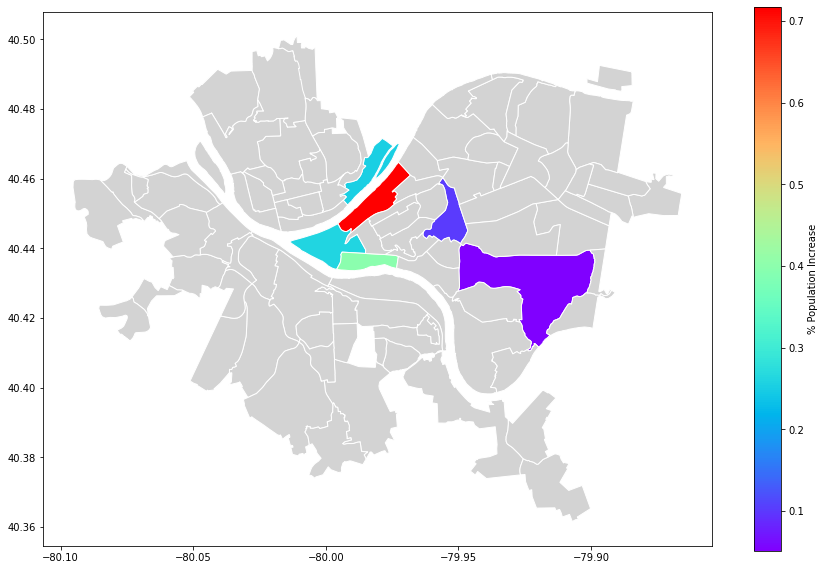

In [3]:
import pandas as pd
import geopandas
%matplotlib inline

# import dataset
pop = pd.read_csv("combinedSET.csv")

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods[['hood','area','perimeter','geometry']]
#neighborhoods.head() # plot the geopandas dataframe

# do the merge
pop_map = neighborhoods.merge(pop, how='left', left_on='hood', right_on='Neighborhood')
# look at the head to confirm it merged correctly
#pop_map[['hood','perc','geometry']].head()

pop_map.plot(column = 'perc',
            cmap='rainbow',           # choose a color palette
            edgecolor="white",        # outline the districts in white
            legend=True,              # show the legend
            legend_kwds={'label': "% Population Increase"}, # label the legend
            figsize=(15, 10),         # set the size
            missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
            )


### Conclusion - 

I was able to remove half of the candidates of neighborhoods which experienced the highest population growth, but all that really did was highlight that very few city neighborhoods experienced *any* growth. It would have been nice if the neighborhoods matched in both sets of data to reflect growth/decline over a large time period of time. It's interesting to note that the rate of decline across all of the neighborhoods, even with consideration to the overall decline of 13.2% exceeds the growth of those neighborhoods which have been documented. This would indicate that a large amount of people are moving out of the neighborhoods closer to the city, with a few exceptions, and towards neighborhoods father into the suburbs, but still in Allegheny County.


### So where did everyone go?

![alt text](https://media.giphy.com/media/X2iqesUkZULQs/giphy.gif)


The second set of data I chose is limited to a 10 year timeframe but includes more neighborhoods within Allegheny County.

### Extract Relevant Data - 

In [5]:
# only extract certain columns
tractDATA = pd.read_csv("tractdata.csv")
tractDATA = tractDATA.iloc[:,[3, 5, 12, 14]] 

# new column  = change in population
tractDATA['Change'] = tractDATA['POP10'].astype(float) - tractDATA['POP00'].astype(float)

# remove tracts which haven't changed, or have declined in population
tractDATA = tractDATA[tractDATA['Change'] > 0]

# there were a few duplicates which only differed in columns that aren't important to 
# our goal -
tractDATA = tractDATA.drop_duplicates(subset=['POP10'], keep='first')

# sort by highest population
tractDATA = tractDATA.sort_values(by='POP10', ascending = False)

tractDATA.reset_index(inplace = True, drop = True)

tractDATA.head(5)

,TRACT00,POP00,TRACT10,POP10,Change
0,408001,4782,409000,11497,6715.0
1,411000,6938,412001,8605,1667.0
2,401100,4467,912700,7307,2840.0
3,450700,3132,451300,7133,4001.0
4,456001,3511,458000,7080,3569.0


### Sort by Population Growth - 

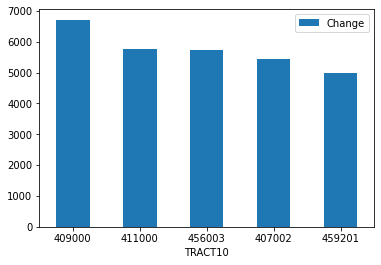

In [6]:
tractDATA1 = tractDATA.sort_values(by='Change', ascending = False)

tractDATA1 = tractDATA1.head(5)
plot1 = tractDATA1.plot.bar(x='TRACT10', y='Change', rot=0)

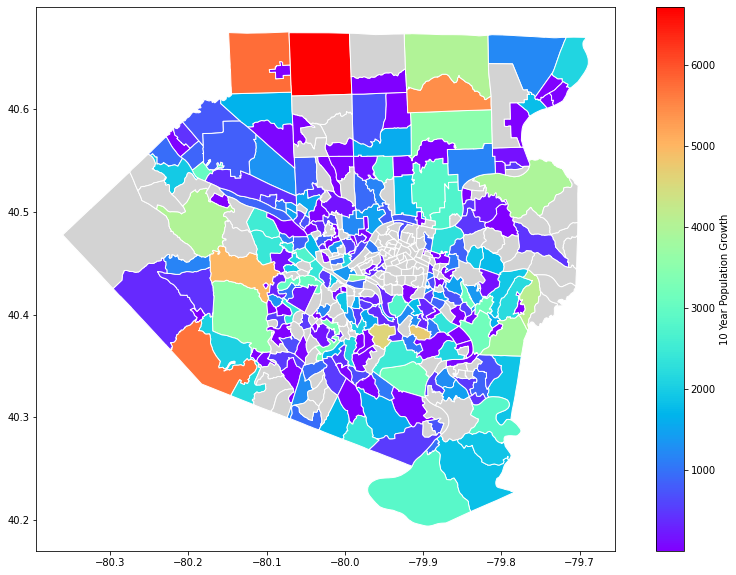

In [7]:
import pandas as pd
import geopandas
%matplotlib inline

county = geopandas.read_file("tmaps/tl_2010_42003_tract10.shp") # read in the shapefile
county[['TRACTCE10','GEOID10','NAME10','INTPTLAT10', 'INTPTLON10']]
#county.plot() # plot the geopandas dataframe

# do the merge
county['TRACTCE10'] = county['TRACTCE10'].astype(int)
tractDATA['TRACT10'] = tractDATA['TRACT10'].astype(int)
pop_map2010 = county.merge(tractDATA, how='left', left_on='TRACTCE10', right_on='TRACT10')


pop_map2010.plot(column = 'Change',
            cmap='rainbow',           # choose a color palette
            edgecolor="white",        # outline the districts in white
            legend=True,              # show the legend
            legend_kwds={'label': "10 Year Population Growth"}, # label the legend
            figsize=(15, 10),         # set the size
            missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
            )



### Conclusion : 

While the second set of data seems to be missing some neighborhoods, this is actually a result of the neighborhoods experiencing a decline in population.

Because the data shows that the lowest population increase is nearly 90% of the total population in 2010 of the highest populated neighborhoods, I'd consider this to be the better metric to determine neighborhood desirability.

The TRACT10 numerical values correspond to the following neighborhoods:

- 1 = Pine Township +6715
- 2 = Marshall Township +5759
- 3 = South Fayette +5718
- 4 = S. West Deer +5430
- 5 = S. Robinson Township +4986

Pine Township has the greatest increase in population from 2000 - 2010.




## **Covid-19 Pandemic -Emily Worster- UwU**



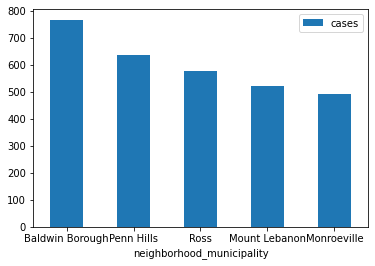

In [10]:
import pandas as pd

#import the downloaded file
covidOut = pd.read_csv("covid.csv")

#use only the rows and colums that are needed to show the result wanted
covidAmount = covidOut.iloc[:,[0,2]] 

#this sorts the cases column to show the greatest number to the least number
covidAmount = covidAmount.sort_values(by='cases', ascending = False)

#this gives the first 5 neighborhoods that have the greatest amount of covid cases
covidAmount = covidAmount.head(5)

#this helps set up the bar graph with the neighborhoods as the x-axis and the number of cases as the y
plot1=covidAmount.plot.bar(x='neighborhood_municipality', y='cases', rot=0)

Through this dataset, you can see who has the greatest amount of covid cases throughout all the neighborhoods. This graph is important and logical to the reasoning of what community to live in because it shows where you can have a greater chance of catching covid and where it is unsafe to live due to the large amounts of interaction your could have with people that might have caught covid.


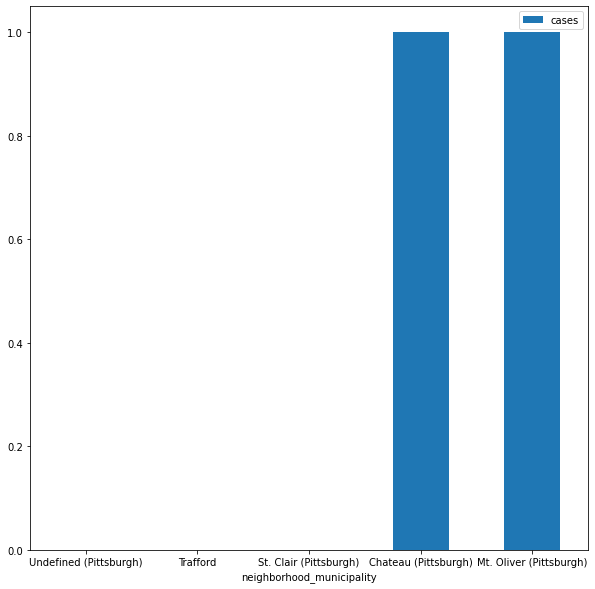

In [11]:
#import the downloaded file
covidOut = pd.read_csv("covid.csv")

#use only the rows and colums that are needed to show the result wanted
covidAmount = covidOut.iloc[:,[0,2]] 

#this sorts the cases column to show the least amount to the highest amount
covidAmount = covidAmount.sort_values(by='cases')

#this gives the first 5 neighborhoods that have the least amount of covid cases
covidAmount = covidAmount.head(5)

#this helps set up the bar graph with the neighborhoods as the x-axis and the number of cases as the y
plot1=covidAmount.plot.bar(x='neighborhood_municipality', y='cases', figsize=(10, 10), rot=0)

## Nursing Homes

In the history of covid, it has been recorded that nursing homes were hit hte hardest with covid, killing millions of elders with the start of one case running throughout the whole building. This might change the idea of how many cases were truly in that area because the nursing home patients would not leave, but maybe the workers inside would catch it, bringing it back to the community in which they live in. There is no data set to show who has the highest amout of nursing homes in the area, but according to some research, according to the department of health in Pennsylvania:

Allegheny County Data

110 nursing home facilities

1741 patients with covid

611 worker cases

328 deaths

This data shows that there were 611 workers, all from different communities that could have easily spread the disease around their area because maybe they did not realize at first or maybe they never had strong symptoms. This could easily cause a spread in a neighborhood without someone even realizing, showing how not all data is truly accurate due to the multiple factors that can apply to them

## Conclusion

After viewing the second graph, it can be concluded that these are the top 5 safest communities to live in based on the amount of covid cases:

1. Mt. Oliver (Pittsburgh)
2. St. Clair (Pittsburgh)
3. Undefined (Pittsburgh)
4. Trafford
5. Chateau (Pittsburgh)

**Citation:**
“LTCF Data.” COVID-19 Long-Term Care Facilities Data for Pennsylvania, Department of Health, 2020, www.health.pa.gov/topics/disease/coronavirus/Pages/LTCF-Data.aspx

![alt text](https://media.giphy.com/media/mDYzVAlAxLUGEg44cJ/giphy.gif)


## **Crime in Pittsburgh -Steven Yang- >.<**

One of the main determining factor when thinking the best neighborhood is to safety. Having a safe location is important for families as a mean to protect their children as much as possible from these people:

![alt text](https://media.giphy.com/media/8EQnmihngXilq/giphy.gif)

### Most Amount of Cases

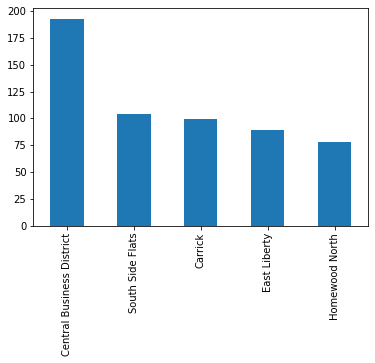

In [1]:
import pandas as pd
import numpy as np

#this reads in the crime data from october to early november
bacon= pd.read_csv("Coconut.csv")

#this counts the amount of time a place has an incident
cheese=bacon['INCIDENTNEIGHBORHOOD'].value_counts()

#this orders the neighborhood from most to least amount of crime
cheese.sort_values(ascending=False)

#plot of the bar graph for most crime
cheese.head().plot(kind='bar')


### Least Amount of cases

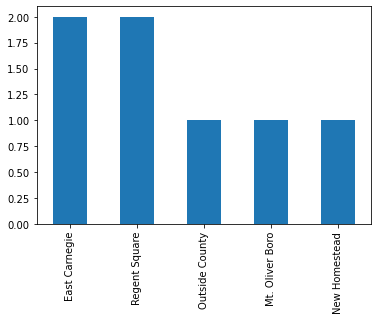

In [2]:
#plot of the bar graph for least crime
cheese.tail().plot(kind='bar')

### An Overview on the map

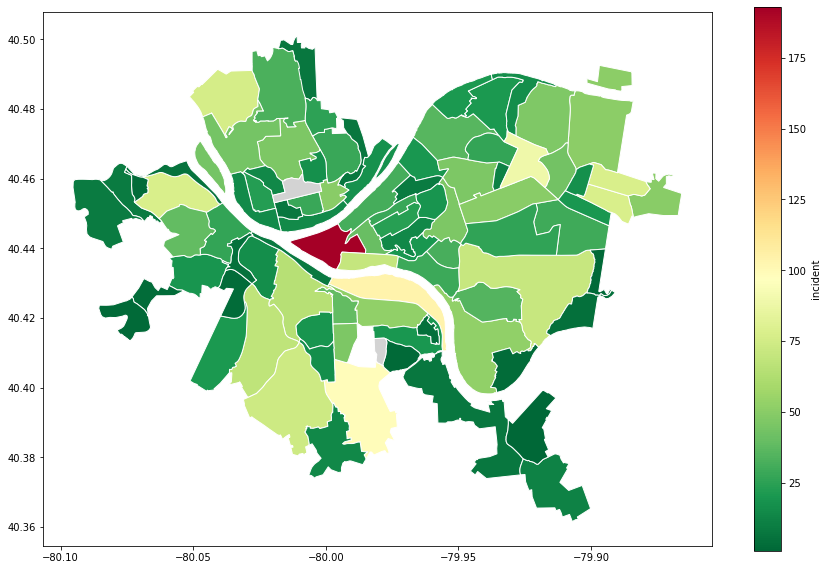

In [3]:
import geopandas
%matplotlib inline

#each incident is one event 
bacon['incident']=1

#this shows the amount of crimes that occured in each incident
hmm=bacon.groupby('INCIDENTNEIGHBORHOOD').sum()

#this plot the graph 
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
crime_map = neighborhoods.merge(hmm, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')
crime_map.plot(column='incident', cmap='RdYlGn_r', edgecolor="white", legend=True, 
               legend_kwds={'label':"incident"},figsize=(15, 10), missing_kwds={"color": "lightgrey"} )

### However that doesn't account for the population of the neighborhood

While the amount of crimes that occurs in the area does determine one's decision of moving in an area. However, these datas didn't account for the population in the area.


In [4]:
#this shows the chart of the population
pop2017 = pd.read_csv("2017pop.csv") 
pop2017.head(15)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411,196.000000
1,Allegheny West,2,343,96.000000
2,Allentown,3,2558,449.773276
3,Arlington,4,1852,348.188168
4,Arlington Heights,5,272,126.000000
5,Banksville,6,3858,581.107563
6,Bedford Dwellings,7,1349,180.000000
7,Beechview,8,8078,719.658252
8,Beltzhoover,9,1702,343.072879
9,Bloomfield,10,8669,491.348145


                 Neighborhood  crime_population
21                    Chateau          0.200000
71                South Shore          1.500000
57                North Shore         13.666667
16  Central Business District         21.036269
80             Strip District         24.096774
41             Homewood South         29.179487
44                    Larimer         38.162791
25             East Allegheny         41.900000
40             Homewood North         43.217949
87                   West End         47.000000
6           Bedford Dwellings         48.178571
1              Allegheny West         49.000000
42              Homewood West         50.000000
0            Allegheny Center         50.392857
30                     Esplen         51.500000
23           Crawford-Roberts         55.625000
27                 East Hills         57.180000
14       California-Kirkbride         57.357143
11                    Bon Air         57.500000
37                       Hays         57

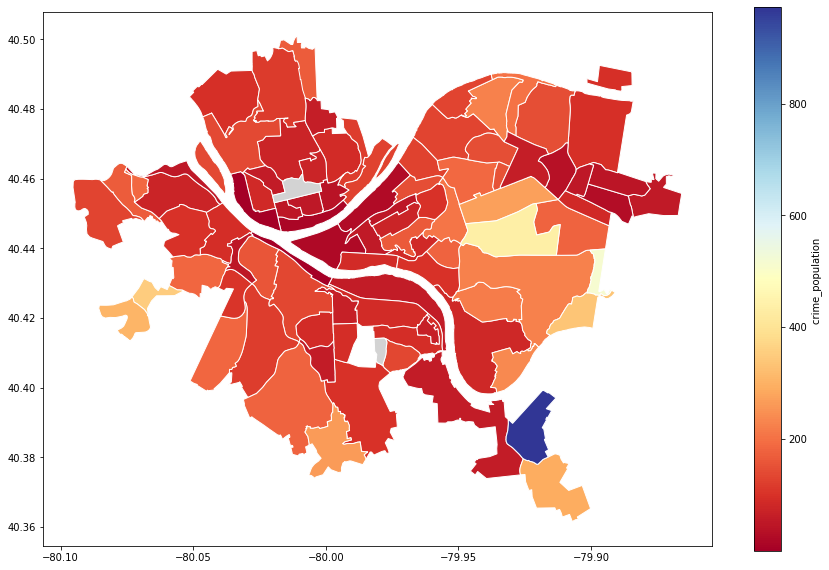

In [5]:
pop2017 = pd.read_csv("2017pop.csv") 

#this merge the two charts and fine the population to crime ratio
crime_map2 = pop2017.merge(hmm, how='left', left_on='Neighborhood', right_on='INCIDENTNEIGHBORHOOD')
crime_map2['crime_population']=(crime_map2['Estimate; Total']/(crime_map2['incident']))

#this shows the data where crimes is the most prevalent.
crime_map2 =crime_map2.sort_values('crime_population',ascending=True)
print(crime_map2.loc[:,['Neighborhood','crime_population']].head(20))

#this prints a map that shows the crime rate based off of population to crime ratio on the map
stuff = neighborhoods.merge(crime_map2, how='left', left_on='hood', right_on='Neighborhood')
stuff.plot(column='crime_population', cmap='RdYlBu', edgecolor="white", legend=True, 
    legend_kwds={'label':"crime_population "},figsize=(15, 10), missing_kwds={"color": "lightgrey"} )

As you can see even then places like city middle is the worst place Here are the data where crime ratio is the least.

In [6]:
print(crime_map2.loc[:,['Neighborhood','crime_population']].tail(15))

            Neighborhood  crime_population
77   Squirrel Hill South        225.943662
79       Stanton Heights        226.714286
35            Glen Hazel        238.666667
60             Overbrook        263.000000
68             Shadyside        271.240000
45         Lincoln Place        291.583333
26         East Carnegie        305.000000
82        Swisshelm Park        336.250000
59               Oakwood        352.666667
76   Squirrel Hill North        436.000000
66         Regent Square        516.500000
55         New Homestead        973.000000
18     Central Northside               NaN
52  Mount Oliver Borough               NaN
54            Mt. Oliver               NaN


## **Conclusion**

### **Top 5 place based off of Population to crime data**

1. New Homestead
2. Swisshelm Park
3. Oakwood
4. Stanton Height
5. Squirrel Hill North

If one considers the crime rate in the area, it is easy to tell why people might move into these areas more than other areas as it provides more safety for their children, which causes places like squirrel hill north to have expensive housing. However, crime doesn't tell the whole story in an area. Some other factors may impacts a person decision from selecting one place over another include education, opportunites, and the pollution within that location. Although places like Central Business District has a decent amount of crime, the job opportunities in the area from large companies cause the housing price in the area to be more than these lower crime rate area.

![alt text](https://media.giphy.com/media/hWXisyrFbbCm293C5F/giphy.gif)


# **Final Combined Conclusion:**

While New Homestead rated low on crime and covid cases, only 6 neighborhoods within Pittsburgh experienced any population increase since the 1980's. We believe that individual metrics are not enough to determine which neighborhood would be considered the best, and may not even point to the neighborhoods we ourselves would want to move to. However, watching the way other people move throughout the city is a good indication of what popular features and amenities are readily accessible. Using the population shift as a base metric, we were able to easily select the neighborhood that also ranked within the top 5 for lowest crime metric and relatively low documented covid cases.

The best neighborhood in Pittsburgh is Squirrel Hill.


# **Questions???**

![alt text](https://media.giphy.com/media/naiatn5LxTOsU/giphy.gif)